# Monte Carlo Simulation - Parameter series

This file implements a simulation for a series of parameter values, for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import figurez as figz
import tablez as tblz


###############################################################################
# Load parameters (defined in simulation file)
parameters, estimators, g_functions, changing_parameter = \
        mc.MC_load_pars('5_4_v3_reg_prod_2018_07_28') 


#changing_parameter['parameter_space'] = [n for n in range(int(2.5*10**2), 10**3+1, int(2.5*10**2))] +\
#                                        [n for n in range(int(2.5*10**3), 10**4+1, int(2.5*10**3))] +\
#                                        [n for n in range(int(2.5*10**4), 10**5, int(2.5*10**4))] #+\
#                                        #[n for n in range(int(2.5*10**5), 10**6+1, int(2.5*10**5))]
#print(changing_parameter['parameter_space'])
parameters

{'seed': 1003,
 'M': 100,
 'k': 1,
 'V': 1,
 'C': 0,
 'Z': 0,
 'B': 0,
 'run_wellspecified': True,
 'add_error': False,
 'parallel': True,
 'decimals': 2,
 'reduce_size': True,
 'save_file': False,
 'filename': '5_4_v3_reg_prod_2018_07_28',
 'start_time': datetime.datetime(2018, 7, 28, 19, 13, 1, 865016),
 'beta_distribution': <function dgp_stuff.draw_beta_normal(k=2, mu=1, stdev=1)>,
 'beta_mean': 1,
 'beta_scale': 1,
 'redraw': False,
 'x_distribution': <function dgp_stuff.draw_x_normal(mu, cov, n=10000, **kwargs)>,
 'x_distribution_parameters': <function dgp_stuff.gen_x_normal_unitvariance_randommean(k=2, mean=1)>,
 'x_mean': 0,
 'u_distribution': <function dgp_stuff.draw_u_normal(n, stdev=1)>,
 'u_scale': 2,
 'y_generate': <function dgp_stuff.gen_y_reg(g, u)>,
 'y_squashing': <function dgp_stuff.linear_output(s)>,
 'y_squashing_prime': <function dgp_stuff.linear_output_prime(s)>,
 'run_observables': True}

In [16]:
subset1 = list(g_functions.keys())[0:2]
models1 = ['DGP']+list(estimators.keys()) 
subset2 = list(g_functions.keys())[2:4]
models2 = ['DGP']+list(estimators.keys())

figtitle = '5_4_v3_reg_'

comp_kws = {'coefficient':0} #Look at one beta.
#del g_functions['Rastrigin']
#g_functions.keys()

### MSE for marginal effects 

In [17]:
#Calculate MMSE
res_mse = smr.comp_wrapper_parseries_g(smr.comp_mse, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions = g_functions, 
                                       comp_kws=comp_kws, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])
res_mse_obs = smr.comp_wrapper_parseries_g(smr.comp_mse, 'res_mrgeffs_obs', 
                                       dgp_series = 'res_mrgeffs_obs', 
                                       g_functions = g_functions, 
                                       comp_kws=comp_kws, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])

IndexError: index 1 is out of bounds for axis 0 with size 1

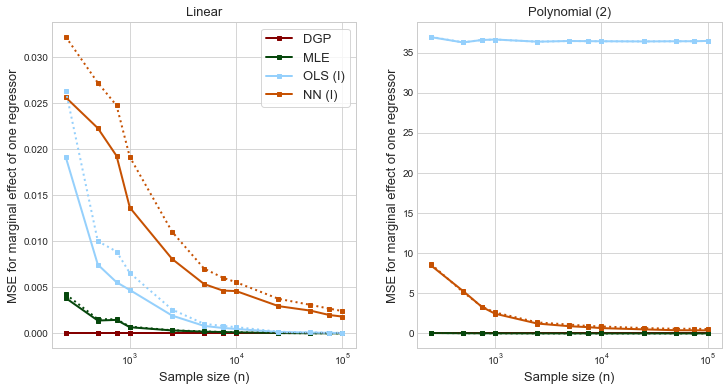

In [4]:
#Show figure 
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_mse, 
                   g_series2 = res_mse_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'MSE for marginal effect of one regressor', 
                   )

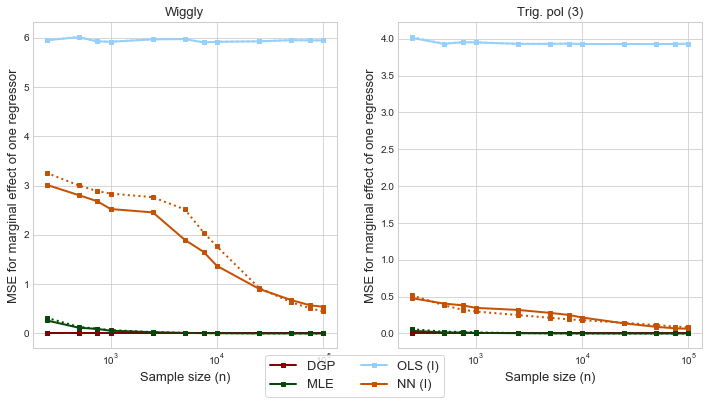

In [5]:
#Show figure 
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_mse, 
                   g_series2 = res_mse_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MMSE_2',
                   legend = 'figure',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'MSE for marginal effect of one regressor', 
                   )

### Mean RMSE for marginal effects

In [6]:
#Calculate MRMSE
res_rmse = smr.comp_wrapper_parseries_g(smr.comp_rmse, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions=g_functions, 
                                       comp_kws=comp_kws, 
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

res_rmse_obs = smr.comp_wrapper_parseries_g(smr.comp_rmse, 'res_mrgeffs_obs', 
                                       dgp_series = 'res_mrgeffs_obs', 
                                       g_functions=g_functions,  
                                       comp_kws=comp_kws,
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

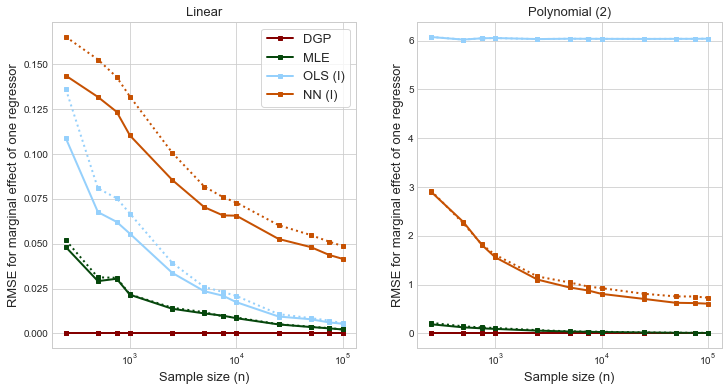

In [7]:
#Show figure 
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_rmse, 
                   g_series2 = res_rmse_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_MRMSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'RMSE for marginal effect of one regressor', 
                   )

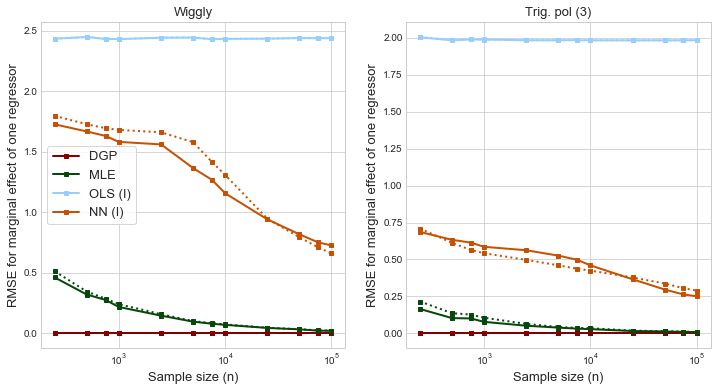

In [8]:
#Show figure 
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_rmse, 
                   g_series2 = res_rmse_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_MRMSE_2',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'RMSE for marginal effect of one regressor', 
                   )

### Mean ME (bias) for marginal effects

In [9]:
#Calculate MME for marginal effects 
res_mme = smr.comp_wrapper_parseries_g(smr.comp_me, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs',
                                       g_functions=g_functions, 
                                       comp_kws = comp_kws, #Look at one beta.
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])
res_mme_obs = smr.comp_wrapper_parseries_g(smr.comp_me, 'res_mrgeffs_obs', 
                                       dgp_series = 'res_mrgeffs_obs',
                                       g_functions=g_functions, 
                                       comp_kws = comp_kws, #Look at one beta.
                                       filename =  parameters['filename'], 
                                       parameter_space = changing_parameter['parameter_space'])

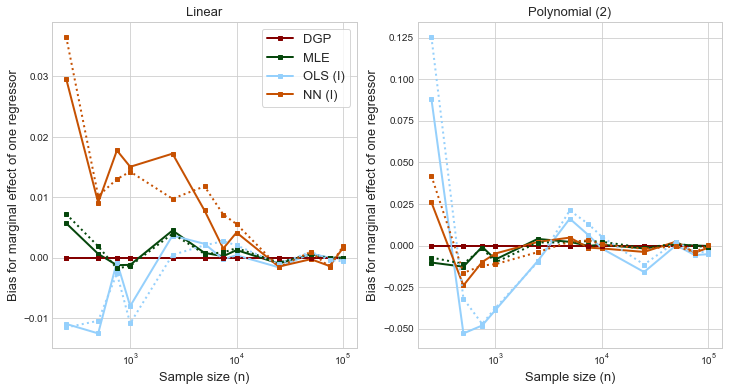

In [10]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                          g_series1 = res_mme, 
                          g_series2 = res_mme_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_ME_1',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'Bias for marginal effect of one regressor', 
                   #ymin = -0.025, ymax = 0.025
                   )

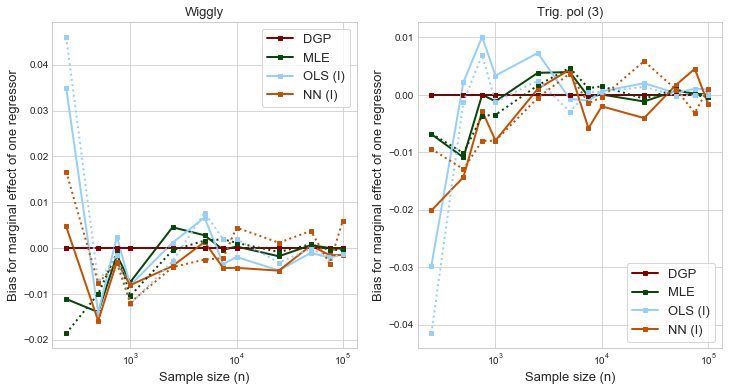

In [11]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_mme, 
                   g_series2 = res_mme_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_ME_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'Bias for marginal effect of one regressor', 
                   #ymin = -0.025, ymax = 0.025
                   )

### Double figure

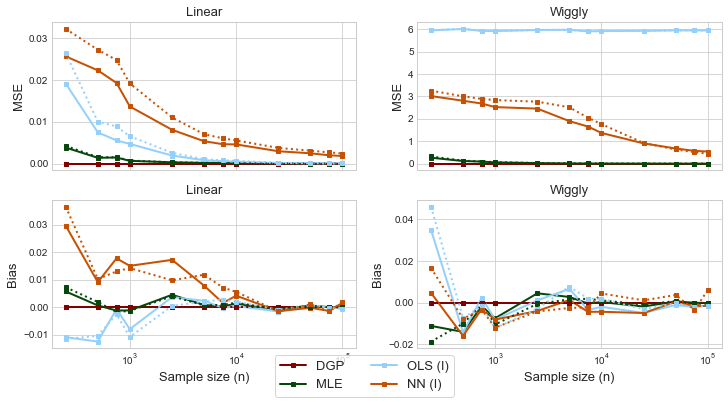

In [15]:
importlib.reload(figz)
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_mse, g_series1_2 = res_mme, 
                   g_series2 = res_mse_obs, g_series2_2 = res_mme_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = ['Linear', 'Wiggly'], 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_double',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log', share_x=True,
                   legend = 'figure',
                   xlabel2 = 'Sample size (n)', 
                   ylabel = 'MSE',
                   ylabel2= 'Bias',       
                   #ymax = [0.035, 4, 0.04, 0.045 ]
                   #ymin = -0.025, ymax = 0.025
                   )

### MSE for average marginal effects 


In [ ]:
res_se_avg = smr.comp_wrapper_parseries_g(smr.comp_se_avg, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs',
                                       g_functions=g_functions,  
                                       comp_kws=comp_kws,
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])

res_se_avg_obs = smr.comp_wrapper_parseries_g(smr.comp_se_avg, 'res_mrgeffs_obs', 
                                       dgp_series = 'res_mrgeffs_obs',
                                       g_functions=g_functions,  
                                       comp_kws=comp_kws,
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])


In [ ]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_se_avg, 
                   g_series2 = res_se_avg_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'SE for marginal effect of one regressor', 
                   )

In [ ]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_se_avg, 
                   g_series2 = res_se_avg_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MSE_2',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'SE for marginal effect of one regressor', 
                   )

### MRSE for average marginal effects 


In [ ]:
res_rse_avg = smr.comp_wrapper_parseries_g(smr.comp_rse_avg, 'res_mrgeffs', 
                                       dgp_series = 'res_mrgeffs', 
                                       g_functions=g_functions, 
                                       comp_kws=comp_kws, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])

res_rse_avg_obs = smr.comp_wrapper_parseries_g(smr.comp_rse_avg, 'res_mrgeffs_obs', 
                                       dgp_series = 'res_mrgeffs_obs', 
                                       g_functions=g_functions, 
                                       comp_kws=comp_kws, 
                                       filename =  parameters['filename'],
                                       parameter_space = changing_parameter['parameter_space'])


In [ ]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_rse_avg, 
                   g_series2 = res_rse_avg_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset1, 
                   models = models1,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_1',
                   legend = 'first',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   xlabel = 'Sample size (n)', ylabel= 'RSE for marginal effect of one regressor', 
                   )

In [ ]:
figz.fig_wrapper_g_double(g_figfunc = figz.fig_parseries, 
                   g_series1 = res_rse_avg, 
                   g_series2 = res_rse_avg_obs, 
                   g_functions=g_functions, estimators = estimators,
                   subset = subset2, 
                   models = models2,
                   save_file=True, filename = figtitle+'mrg_avg_MRSE_2',
                   n_rows = 1, n_cols=2, share_y=False, xscale='log',
                   legend = 'first',
                   xlabel = 'Sample size (n)', ylabel= 'RSE for marginal effect of one regressor', 
                   )